<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/35_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 와인 분류 문제

# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'wine.csv')
wine_df = pd.read_csv(file_path)
wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
"""
데이터 : Red Wine Quality

출처 : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


alcohol : 알코올 도수
sugar : 당도
pH : pH

class : 타깃값!
   0 이면 레드와인
   1 이면 화이트 와인
   => 이진분류문제!

화이트와인이 양성클래스.  전체와인 데이터에서 화이트와인을 골라내는 문제다!

"""
None

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine_df.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [ ]:
data = wine_df[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine_df['class'].to_numpy()

In [ ]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [ ]:
# train / test 세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
  train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [ ]:
# 전처리:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 일단 로지스틱 회귀로 훈련

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
# LogisticRegression 의 solver= 매개변수 : 사용할 알고리즘 선택
#   'lbfgs' : 기본값
#   'sag' : 사이킷럿 0.17 에 추가. 확률적경사하강법 알고리즘으로 특성과 샘플수가 많을때 성능은 빠르고 좋다
#   'saga' : 사이킷럿 0.19 에 추가.  sag 의 개선 버전


# 설명하기 쉬운 모델 vs 어려운 모델

In [ ]:
# 계수와 절편 확인
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# 학습한 모델에 대해 설명
# z = 0.51270274 x 알코올 + 1.6733911 x 당도 - 0.68767781 x pH + 1.81777902

# z가 0보다 크면 화이트 와인
#     0보다 작으면 레드와인

In [ ]:
# 대부분의 머신러닝 모델은 학습의 결과를 설명하기 어렵다. (계수의 의미 등..)

In [ ]:
# 과연 '순서도(flow chart)'처럼 설명할 수 있는 방법은 없을까?

# 결정트리 (Decision Tree)
DecisionTreeClassifier

In [ ]:
# Decision Tree 모델은 이유를 설명하기 쉬운 모

예시)

![](https://miro.medium.com/v2/resize:fit:1400/1*JKtdhKsFMWB-yN9YNW1JYQ.png)


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

```python
class sklearn.tree.DecisionTreeClassifier(
  *,
  criterion='gini',
  splitter='best',
  max_depth=None,
  min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
  random_state=None,
  max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None,
  ccp_alpha=0.0,
  monotonic_cst=None)
```


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [ ]:
# 로지스틱 회귀보다 높은 점수이긴 하나
# overfit 된 모델로 의심

In [ ]:
# random_state=
# 최적의 분할을 찾기 전에 '특성의 순서' 를 섞는다. (무작위로..)
# 수업중에는 가급적 같은 결과를 내기 위해 random_state 지정함.

## 트리 시각화 plot_tree()

In [ ]:
from sklearn.tree import plot_tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

```python
sklearn.tree.plot_tree(
  decision_tree,
  *,
  max_depth=None, # 그림그릴 tree 깊이 제한
  feature_names=None,
  class_names=None,
  label='all',
  filled=False,
  impurity=True,
  node_ids=False,
  proportion=False,
  rounded=False,
  precision=3,
  ax=None,
  fontsize=None)
```



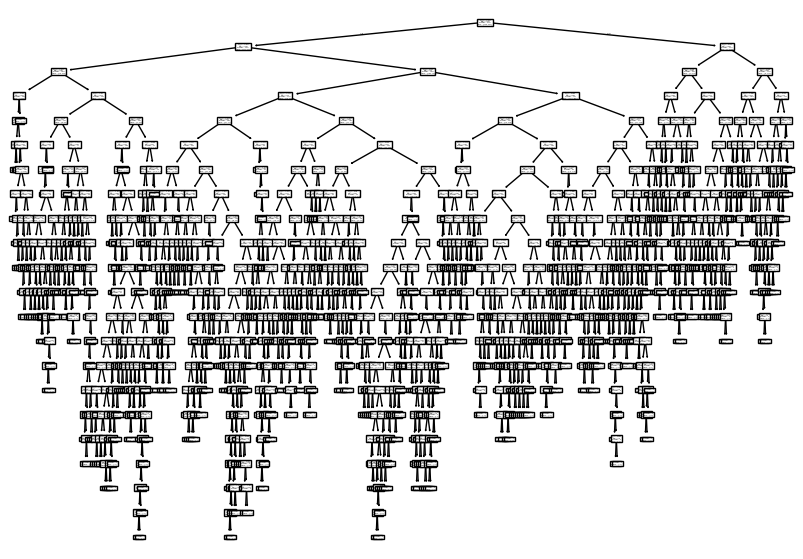

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [ ]:
#  최상위 노드 : root node
#  맨 아래 끝의 노드 : leaf node

#  '노드' 는 결정트리를 구성하는 핵심요소
#  훈련데이터의 특성에 대한 테스트를 표현
#  ex)  현재 샘플의 당도가 -0.239 보다 작거나 같은지 테스트

# '가지(branch)' 는 테스트의 결과 (True, False) 를 나타낸다
# 일반적으로 하나의 노드는 2개의 가지를 가집니다.

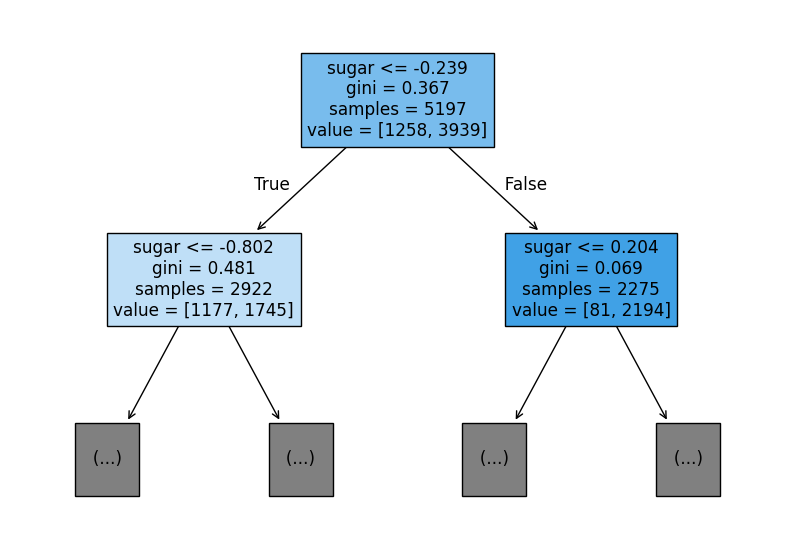

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [ ]:
# [노드에 표시된 내용]
#  1. 테스트 조건
#  2. 불순도 (gini)
#  3. 총 샘플수 (samples) : 현 규칙(노드)의  데이터 건수
#  4. 클래스별 샘플수 (value) : 클래스 값 기반의 데이터 건수
#   ★ 위 그림에서 헷갈리지 말자, 클래스별 샘플수 이지, Yes, No 에 의해 분기된 샘플수가 아니다!

# 결정트리 예측 방법

In [ ]:
# 분류문제에선
# '리프노드에서 가장 많은 클래스' 가 예측 클래스가 된다!

In [ ]:
# 참고] 회귀문제에선 (DecisionTreeRegressor)
# 리프노트에 도달한 샘플의 타겟을 평균하여 예측값으로 사용.

## 불순도 (impurity)

### Gini impurity

In [ ]:
# 불순도
# 'gini'  : 지니 불순도 (Gini impurity)
#       DecisionTreeClassifier 클래스의 criterion 매개변수 기본값이 'gini'
#       criterion= 매개변수 : 노드에서 데이터를 분할할 기준을 정함

In [ ]:
# 지니 불순도 계산방식
#     클래스의 비율을 제곱해서 더한 다음 1에서 빼면 됨.
#
#      지니불순도 = 1 - (음성 클래스 비율²  + 양성 클래스 비율²)
#  루트 노드의 지니 불순도를 계산해보면
#      1 - ((1258 / 5197)² + (3939/5197)²) = 0.367

In [ ]:
# 만약 100개의 샘플이 있는 어떤 노드의 두 클래스 비율이 정확이 1/2 씩이라면?
#      1 - ((50 / 100)² + (50 / 100)²) = 0.5   <- 불순도가 '최악'

# 노드에 하나의 클래스만 있다면
#      1 - ((100 / 100)² + (0 / 100)²) = 0   <- 불순도가 0  <- '순수 노드'라 함

### 정보이득 (information gain)

In [ ]:
# 결정트리 모델은 부모노드 (parent node) 와 자식 노드 (child node) 의 '불순도 차이'가
# 가능한 크도록 트리를 성장시킨다

# '불순도차이' 계산방식
#  1.자식노드의 불순도를 샘플 계수에 비례하여 모두 더한다.
#  2.부모노드의 불순도에서 뺀다.

#  부모의 불순도
#      - (왼쪽 노드 샘플 수 / 부모의 샘플 수) x 왼쪽 노드 불순도
#         - (오른쪽 노드 샘플 수 / 부모의 샘플 수) x 오른쪽 노드 불순도

#  0.367 - (2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066

# 이와같이,  부모와 자식 사이의 불순도 차이를 '정보이득 (information gain)' 이라 한다


### 엔트로피 불순도

In [ ]:
# criterion='entropy' 를 지정하여 사용.
# 엔트로피 불순도도 노드의 클래스 비율을 사용하지만
# 지니 불순도 처럼 제곱이 아니라 '밑이 2인 로그'를 사용하여 곱합니다.

In [ ]:
# 새로운 샘플에 대해 예측할때 => 노드의 질문에 따라 트리를 이동.
#  =>마지막에 도달한 노드의 클래스 비율을 보고 예측.

# 그런데 앞의 트리는 '제한 없이' 자라났기 때문에
# 훈련세트보다 테스트 세트에서 점수가 크게 낮았습니다.
# => 과대적합 발생 (일반화 가 안됨)

## 가지치기 max_depth=
overfit 억제

In [ ]:
# max_depth=3 <- 최대 3개의 노드까지만 Tree가 성장할 수 있도록 해보자

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


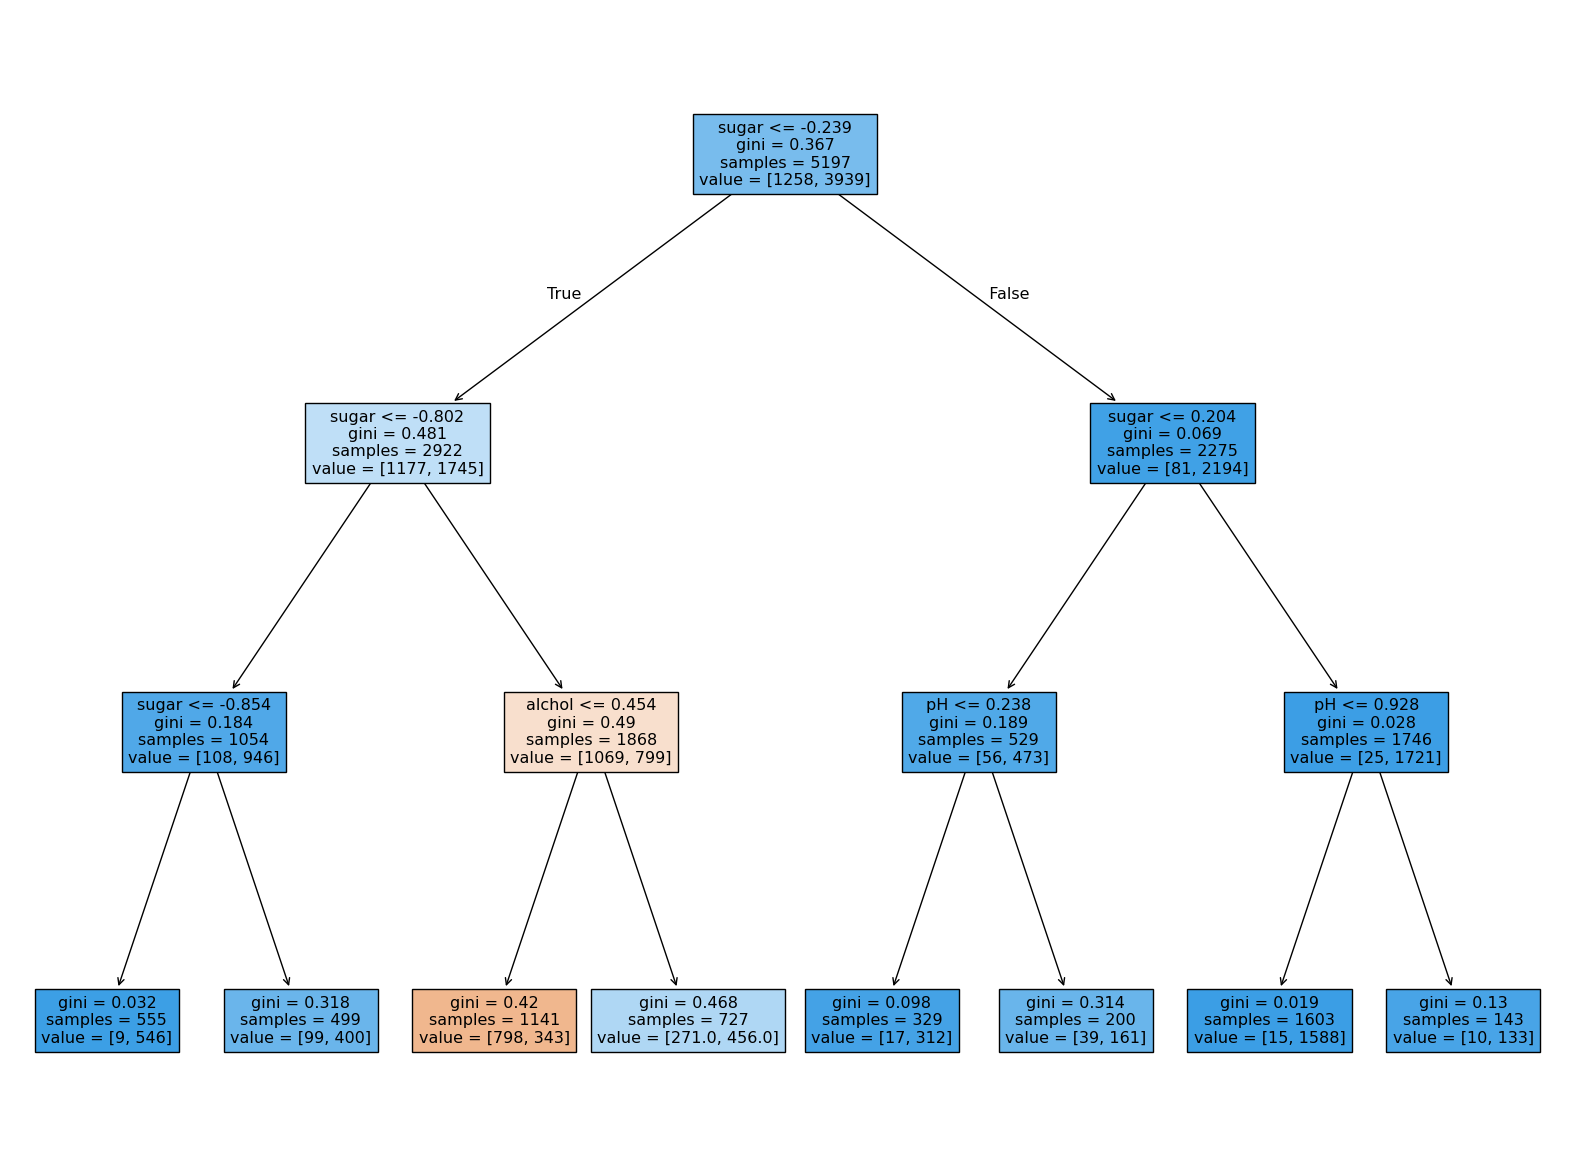

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 왼쪽에서 세번째 노드만 음성클래스 판정
# 그럼 루트에서 이 노드까지 도달하려면? 즉, 레드와인 (음성클래스) 로 판정하는 경우는?

# 당도는 -0.239보다 작고
# 또 -0.802 보다 커야 합니다.
# 그리고 알코올 도수는 0.454 보다 작아야 합니다.

# 그럼 세번째 리프노드에 도달하네요.  즉! 당도가 -0.802 보다 크고 -0.239 보다 작은 와인중에 알코올 도수가
# 0.454 와 같거나 작은 것이 레드 와인입니다.

# ↑ 예측 결과에 대한 설명이 가능해진다!

## 결정트리는 전처리 필요없다.
- ↓결정 트리는 표준화 전처리 과정이 필요 없다!
    - 특성값의 스케일이 계산에 영향을 주지 않는다!




In [ ]:
# 그런데, 당도가 음수다?  (말이 안된다.) => 이유는?  전처리(표준화) 했기 때문.

# 결정트리는 '불순도' 를 기준으로 샘플을 나눈다 => 특성값이 아닌 '클래스별 비율'을 가지고 계산한다.
# 따라서 특성값 의 스케일은 영향을 주지 않는다!

# 전처리 필요가 없다 => 결정트리 알고리즘의 장점중 하나

In [ ]:
# 전처리 하기전의 훈련세트 와 테스트 세트로 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


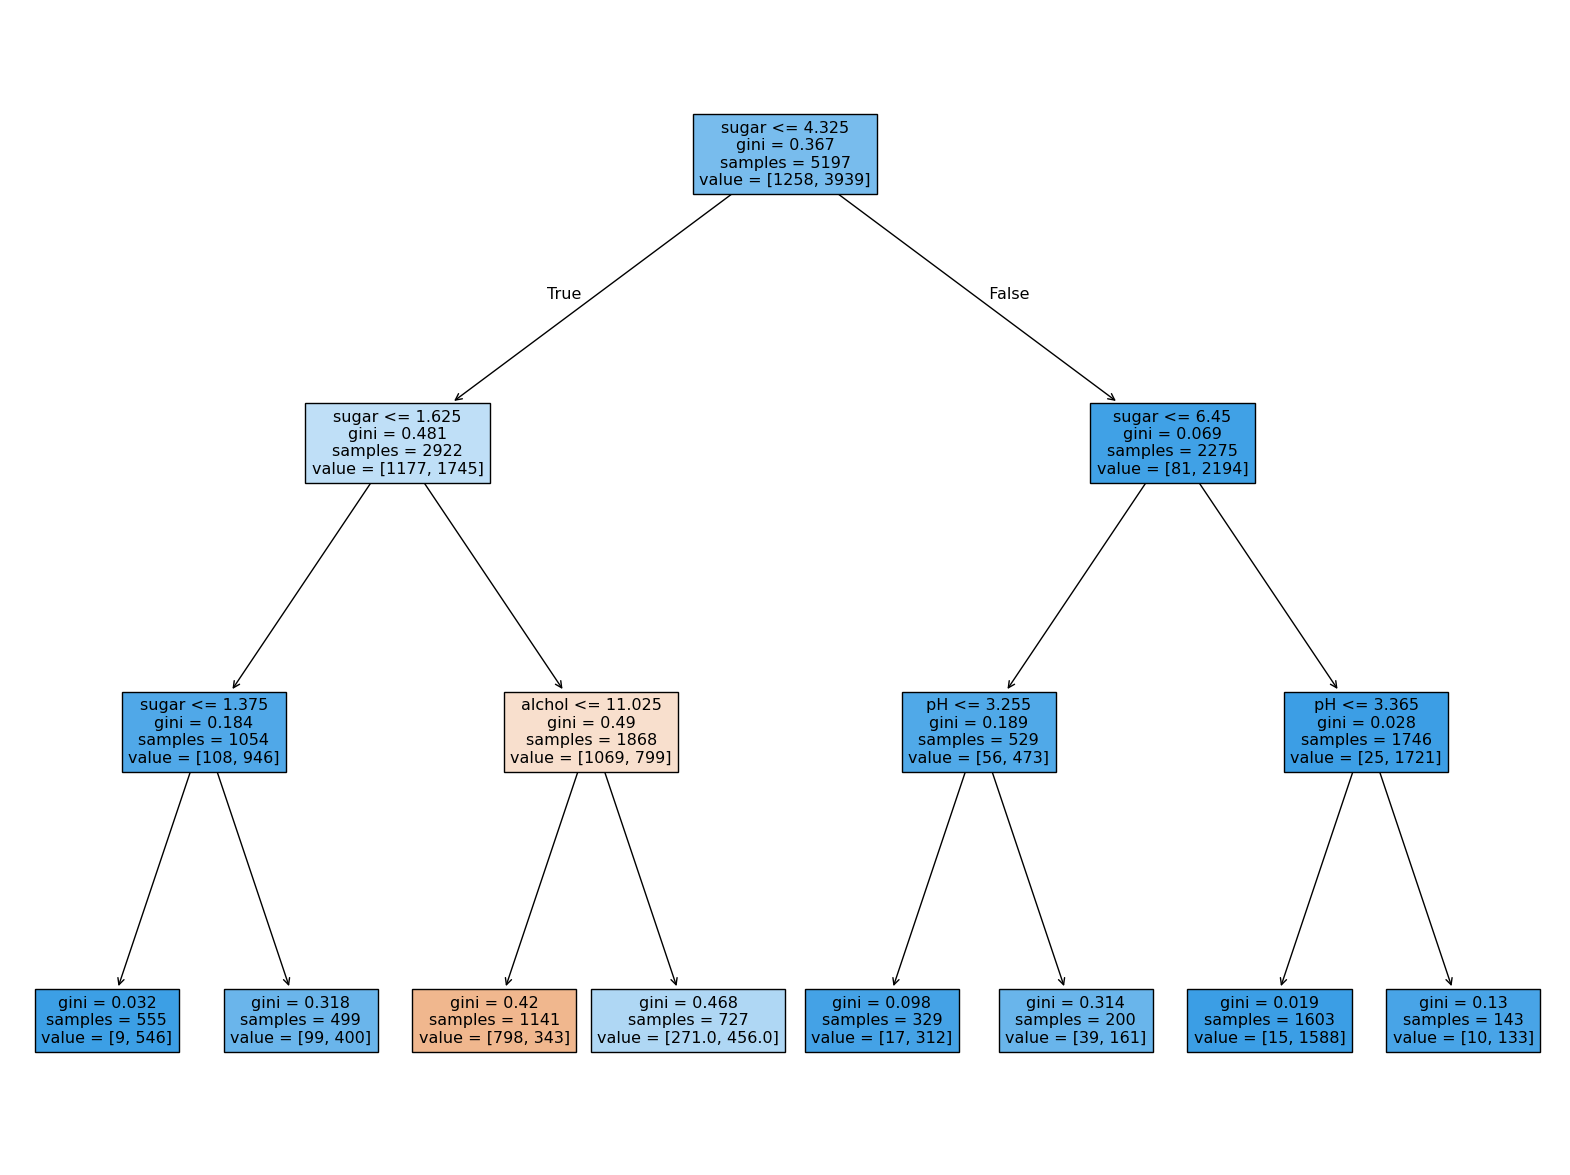

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 이제 제대로 된 수치로 예측 결과에 대한 수치 설명이 가능해졌따.
# 당도가 1.625 보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025 와 같거나 작은 것이 레드 와인이다!

# 그 외에는 모두 화이트 와인으로 예측했습니다.

## 특성 중요도 (feature importance)

In [ ]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [ ]:
#    alchol,    sugar,      pH
# [0.12345626, 0.86862934, 0.0079144]

# sugar 의 특성중요도가 가장 높다  (첫번째 노드부터 sugar 로 구분하고 있었다!)
# 위 값을 모두 더하면 1.

# 특성중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산합니다.
# ★특성중요도를 활용하면 결정트리모델을 특성 선택에 활용할 수 있습니다.
# 이것이 결정 트리 알고리즘의 또다른 장점중 하나입니다.
